In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Subway_Data.csv')
rows, cols = df.shape
print("Number of Rows:", rows, "\nNumber of Columns:", cols)

/var/folders/8v/myv9ql5d1lg4ct7vbb0zh8000000gn/T/ipykernel_27479/2629346002.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Subway_Data.csv')


Number of Rows: 18116710 
Number of Columns: 15


In [3]:
df

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference,Counties,NYS Municipal Boundaries,New York Zip Codes
0,12/15/2022 06:00:00 AM,subway,225,"47-50 Sts-Rockefeller Ctr (B,D,F,M)",Manhattan,metrocard,Metrocard - Other,2,0,40.758663,-73.981331,POINT (-73.98133087158203 40.758663177490234),2095,749,743.0
1,06/16/2022 01:00:00 AM,subway,225,"47-50 Sts-Rockefeller Ctr (B,D,F,M)",Manhattan,metrocard,Metrocard - Full Fare,59,0,40.758663,-73.981331,POINT (-73.98133087158203 40.758663177490234),2095,749,743.0
2,04/17/2022 05:00:00 PM,subway,225,"47-50 Sts-Rockefeller Ctr (B,D,F,M)",Manhattan,metrocard,Metrocard - Other,21,0,40.758663,-73.981331,POINT (-73.98133087158203 40.758663177490234),2095,749,743.0
3,04/13/2022 07:00:00 PM,subway,225,"47-50 Sts-Rockefeller Ctr (B,D,F,M)",Manhattan,metrocard,Metrocard - Full Fare,744,4,40.758663,-73.981331,POINT (-73.98133087158203 40.758663177490234),2095,749,743.0
4,12/03/2022 05:00:00 PM,subway,225,"47-50 Sts-Rockefeller Ctr (B,D,F,M)",Manhattan,metrocard,Metrocard - Other,85,0,40.758663,-73.981331,POINT (-73.98133087158203 40.758663177490234),2095,749,743.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18116705,06/01/2024 09:00:00 PM,subway,314,66 St-Lincoln Center (1),Manhattan,metrocard,Metrocard - Seniors & Disability,70,2,40.773440,-73.982210,POINT (-73.98221 40.77344),2095,749,750.0
18116706,06/01/2024 01:00:00 PM,subway,225,"47-50 Sts-Rockefeller Ctr (B,D,F,M)",Manhattan,metrocard,Metrocard - Seniors & Disability,25,0,40.758663,-73.981330,POINT (-73.98133 40.758663),2095,749,743.0
18116707,06/01/2024 05:00:00 PM,subway,477,72 St (Q),Manhattan,metrocard,Metrocard - Unlimited 7-Day,39,0,40.768800,-73.958430,POINT (-73.95843 40.7688),2095,749,744.0
18116708,06/01/2024 09:00:00 AM,subway,404,28 St (6),Manhattan,omny,OMNY - Full Fare,173,1,40.743070,-73.984260,POINT (-73.98426 40.74307),2095,749,739.0


In [4]:
dtype_info = df.dtypes
missing_values_info = df.isna().sum()

info_table = pd.DataFrame({
    'dtype': dtype_info,
    'missing_values': missing_values_info
})

info_table

,dtype,missing_values
transit_timestamp,object,0
transit_mode,object,0
station_complex_id,object,0
station_complex,object,0
borough,object,0
payment_method,object,0
fare_class_category,object,0
ridership,int64,0
transfers,int64,0
latitude,float64,0


In [5]:
# Check for duplicate rows
print('Number of duplicate rows before duplicates dropped:', df.duplicated().sum())

Number of duplicate rows before duplicates dropped: 0


**Separate datetime**

In [6]:
df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'])

In [7]:
df['day'] = df['transit_timestamp'].dt.dayofweek
df['month'] = df['transit_timestamp'].dt.month
df['year'] = df['transit_timestamp'].dt.year
df['hour'] = df['transit_timestamp'].dt.hour

df.drop(columns=['transit_timestamp'], inplace=True)

In [8]:
unique_values = {
    'day': sorted(df['day'].unique()),
    'month': sorted(df['month'].unique()),
    'year': sorted(df['year'].unique()),
    'hour': sorted(df['hour'].unique())
}

print(unique_values)

{'day': [0, 1, 2, 3, 4, 5, 6], 'month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'year': [2022, 2023, 2024], 'hour': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]}


**Remove features**

In [9]:
df.drop(columns=['transit_mode', 'borough', 'payment_method', 'fare_class_category', 'transfers', 'Georeference', 'Counties', 'NYS Municipal Boundaries', 'New York Zip Codes'], inplace=True)

**Station Complex data**  
Unique lat and lon values are different to number of stations

In [10]:
nunique_station_id = df['station_complex_id'].nunique()
nunique_station_id = df['station_complex'].nunique()

nunique_lat = df['latitude'].nunique()
nunique_lon = df['longitude'].nunique()

print(nunique_station_id, nunique_station_id)
print(nunique_lat, nunique_lon)

123 123
293 294


**Check case where different values**

In [11]:
df_complex = df[df['station_complex_id'] == '225']

nunique_lon_rock = df_complex['longitude'].nunique()
unique_lon_rock = df_complex['longitude'].unique()

nunique_lat_rock = df_complex['latitude'].nunique()
unique_lat_rock = df_complex['latitude'].unique()

print(nunique_lon_rock, unique_lon_rock)
print(nunique_lat_rock, unique_lat_rock)

2 [-73.98133    -73.98133087]
2 [40.758663   40.75866318]


**First round on df_complex dataset to analyse result**

In [12]:
df_complex.loc[:, 'latitude'] = df_complex['latitude'].round(5)
df_complex.loc[:, 'longitude'] = df_complex['longitude'].round(5)

nunique_lon_rock = df_complex['longitude'].nunique()
unique_lon_rock = df_complex['longitude'].unique()

nunique_lat_rock = df_complex['latitude'].nunique()
unique_lat_rock = df_complex['latitude'].unique()

print(nunique_lon_rock, unique_lon_rock)
print(nunique_lat_rock, unique_lat_rock)

1 [-73.98133]
1 [40.75866]


**Apply to main df**  
More Latitude values than Longitude, both higher value than number of station complexes

In [13]:
df.loc[:, 'latitude'] = df['latitude'].round(5)
df.loc[:, 'longitude'] = df['longitude'].round(5)

nunique_lat = df['latitude'].nunique()
nunique_lon = df['longitude'].nunique()
print(nunique_lat, nunique_lon)

155 150


**View stations with multiple lat or lon values**

In [14]:
unique_complexes = df['station_complex'].unique()

for complex_name in unique_complexes:
    complex_df = df[df['station_complex'] == complex_name]
    
    unique_latitudes = complex_df['latitude'].nunique()
    unique_longitudes = complex_df['longitude'].nunique()
    
    if unique_latitudes > 1 or unique_longitudes > 1:
        unique_latitude_values = complex_df['latitude'].unique()
        unique_longitudes_values = complex_df['longitude'].unique()
        
        print(f'{complex_name}: Latitude: {unique_latitude_values}')
        print(f'{complex_name}: Longitude: {unique_longitudes_values}')
        print('\n')


East Broadway (F): Latitude: [40.71371 40.71372]
East Broadway (F): Longitude: [-73.99017]


28 St (1): Latitude: [40.74721 40.74722]
28 St (1): Longitude: [-73.99336]


28 St (R,W): Latitude: [40.7455  40.74549]
28 St (R,W): Longitude: [-73.98869]


Broad St (J,Z): Latitude: [40.70647]
Broad St (J,Z): Longitude: [-74.01106 -74.01105]


Fulton St (A,C,J,Z,2,3,4,5): Latitude: [40.71037 40.7102  40.70942]
Fulton St (A,C,J,Z,2,3,4,5): Longitude: [-74.00657 -74.00769 -74.00758 -74.00951]


168 St (A,C,1): Latitude: [40.84072 40.84056]
168 St (A,C,1): Longitude: [-73.93956 -73.94013]


Canal St (1): Latitude: [40.72286 40.72285]
Canal St (1): Longitude: [-74.00628]


Bryant Pk (B,D,F,M)/5 Av (7): Latitude: [40.75422 40.75382]
Bryant Pk (B,D,F,M)/5 Av (7): Longitude: [-73.98196 -73.98457]


RI Tramway (Roosevelt): Latitude: [40.75734]
RI Tramway (Roosevelt): Longitude: [-73.95412 -73.95411]


Canal St (J,N,Q,R,W,Z,6): Latitude: [40.71953 40.71809 40.7188 ]
Canal St (J,N,Q,R,W,Z,6): Longitude

**Multiple entries likely due to different entrances/exits to subway complex. Will take mode coordinates**

In [16]:
for complex_name in unique_complexes:
    complex_df = df[df['station_complex'] == complex_name]
    
    most_common_lat = complex_df['latitude'].mode()[0]
    most_common_lon = complex_df['longitude'].mode()[0]
    
    df.loc[df['station_complex'] == complex_name, 'latitude'] = most_common_lat
    df.loc[df['station_complex'] == complex_name, 'longitude'] = most_common_lon
    

In [17]:
df.to_csv('Clean_Subway_Data.csv', index=False)

In [18]:
df = pd.read_csv('Clean_Subway_Data.csv')

/var/folders/8v/myv9ql5d1lg4ct7vbb0zh8000000gn/T/ipykernel_27479/15168158.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Clean_Subway_Data.csv')


In [19]:
df.dtypes

station_complex_id     object
station_complex        object
ridership               int64
latitude              float64
longitude             float64
day                     int64
month                   int64
year                    int64
hour                    int64
dtype: object

In [20]:
df.drop(columns=['station_complex'], inplace=True)

In [21]:
df.head()

,station_complex_id,ridership,latitude,longitude,day,month,year,hour
0,225,2,40.75866,-73.98133,3,12,2022,6
1,225,59,40.75866,-73.98133,3,6,2022,1
2,225,21,40.75866,-73.98133,6,4,2022,17
3,225,744,40.75866,-73.98133,2,4,2022,19
4,225,85,40.75866,-73.98133,5,12,2022,17


In [22]:
df

,station_complex_id,ridership,latitude,longitude,day,month,year,hour
0,225,2,40.75866,-73.98133,3,12,2022,6
1,225,59,40.75866,-73.98133,3,6,2022,1
2,225,21,40.75866,-73.98133,6,4,2022,17
3,225,744,40.75866,-73.98133,2,4,2022,19
4,225,85,40.75866,-73.98133,5,12,2022,17
...,...,...,...,...,...,...,...,...
18116705,314,70,40.77344,-73.98221,5,6,2024,21
18116706,225,25,40.75866,-73.98133,5,6,2024,13
18116707,477,39,40.76880,-73.95843,5,6,2024,17
18116708,404,173,40.74307,-73.98426,5,6,2024,9


**Group data by location and time**

In [23]:
grouped_df = df.groupby(['station_complex_id', 'latitude', 'longitude', 'year', 'month', 'day', 'hour'], observed=False)['ridership'].sum().reset_index()

In [24]:
grouped_df

,station_complex_id,latitude,longitude,year,month,day,hour,ridership
0,8,40.76481,-73.97335,2022,2,0,0,97
1,8,40.76481,-73.97335,2022,2,0,1,31
2,8,40.76481,-73.97335,2022,2,0,2,8
3,8,40.76481,-73.97335,2022,2,0,3,9
4,8,40.76481,-73.97335,2022,2,0,4,8
...,...,...,...,...,...,...,...,...
634037,TRAM2,40.75734,-73.95411,2024,6,6,19,315
634038,TRAM2,40.75734,-73.95411,2024,6,6,20,278
634039,TRAM2,40.75734,-73.95411,2024,6,6,21,223
634040,TRAM2,40.75734,-73.95411,2024,6,6,22,111


In [25]:
grouped_df['station_complex_id'] = grouped_df['station_complex_id'].astype('category')
grouped_df['latitude'] = grouped_df['latitude'].astype(float)
grouped_df['longitude'] = grouped_df['longitude'].astype(float)
grouped_df['year'] = grouped_df['year'].astype(int)
grouped_df['month'] = grouped_df['month'].astype(int)
grouped_df['day'] = grouped_df['day'].astype(int)
grouped_df['hour'] = grouped_df['hour'].astype(int)
grouped_df['ridership'] = grouped_df['ridership'].astype(float)

**Final data checks**

In [26]:
print('Number of duplicate rows:', grouped_df.duplicated().sum())
print('Number of missing values:\n', grouped_df.isna().sum())

Number of duplicate rows: 0
Number of missing values:
 station_complex_id    0
latitude              0
longitude             0
year                  0
month                 0
day                   0
hour                  0
ridership             0
dtype: int64


In [27]:
datetime_features = ['day', 'month', 'year', 'hour']

**Counts**

In [28]:
for feature in datetime_features:
    counts = grouped_df.groupby(feature, observed=True)['ridership'].sum()
    print(f"Counts for {feature}:")
    print(counts)
    print()

Counts for day:
day
0    203497290.0
1    241521888.0
2    248983252.0
3    246685097.0
4    221230825.0
5    156158811.0
6    125026494.0
Name: ridership, dtype: float64

Counts for month:
month
1     100174704.0
2     130586002.0
3     158102621.0
4     154309254.0
5     164457401.0
6     113306734.0
7      95388865.0
8      98269519.0
9     103559185.0
10    111799118.0
11    106269536.0
12    106880718.0
Name: ridership, dtype: float64

Counts for year:
year
2022    512608116.0
2023    643210369.0
2024    287285172.0
Name: ridership, dtype: float64

Counts for hour:
hour
0      16358088.0
1       6771575.0
2       3572470.0
3       2321788.0
4       2929533.0
5       8949821.0
6      25045875.0
7      56815020.0
8      85335874.0
9      64883480.0
10     53372521.0
11     57044567.0
12     65341584.0
13     73256672.0
14     89245347.0
15    114522413.0
16    137326515.0
17    167489271.0
18    132438732.0
19     87757152.0
20     64195215.0
21     52752165.0
22     45101918.0
23  

In [29]:
average_ridership = grouped_df.groupby('station_complex_id')['ridership'].mean().reset_index()

/var/folders/8v/myv9ql5d1lg4ct7vbb0zh8000000gn/T/ipykernel_27479/2033651073.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ridership = grouped_df.groupby('station_complex_id')['ridership'].mean().reset_index()


In [30]:
average_ridership

,station_complex_id,ridership
0,8,1513.620485
1,9,142.480188
2,10,837.058697
3,13,1069.157980
4,14,1833.622509
...,...,...
239,635,2914.613333
240,8,1688.415472
241,9,3545.028053
242,TRAM1,748.358052


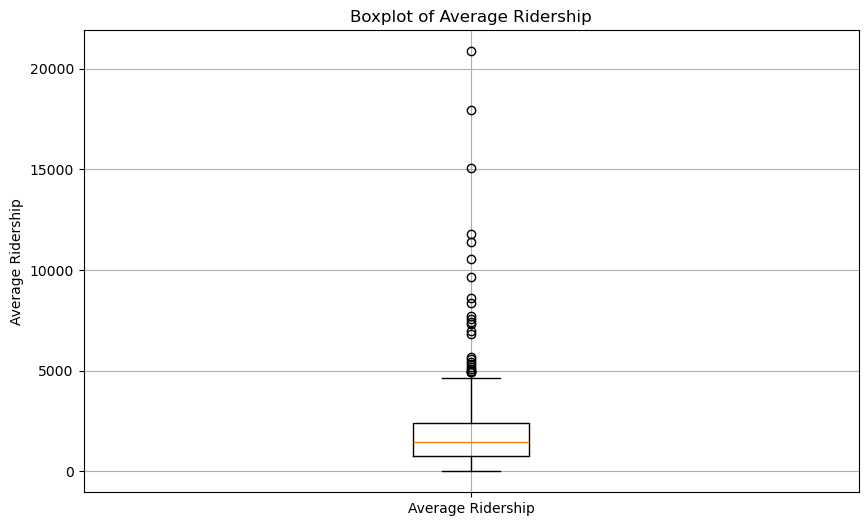

In [31]:
plt.figure(figsize=(10, 6))
plt.boxplot(average_ridership['ridership'], labels=['Average Ridership'])
plt.title('Boxplot of Average Ridership')
plt.ylabel('Average Ridership')
plt.grid(True)
plt.show()

**Correlation Plots**

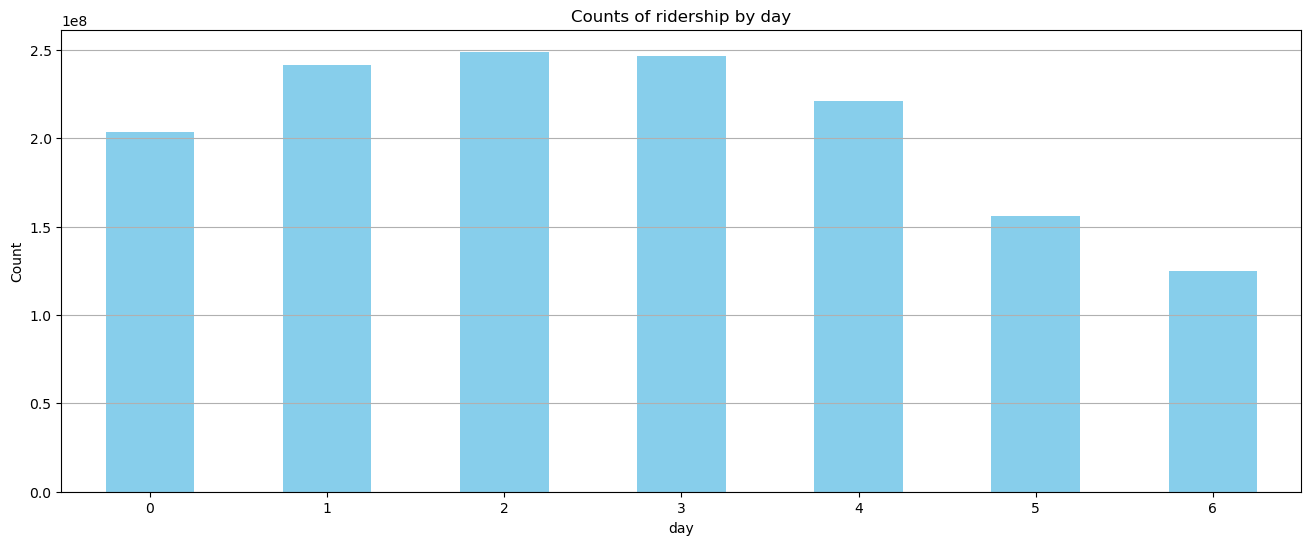

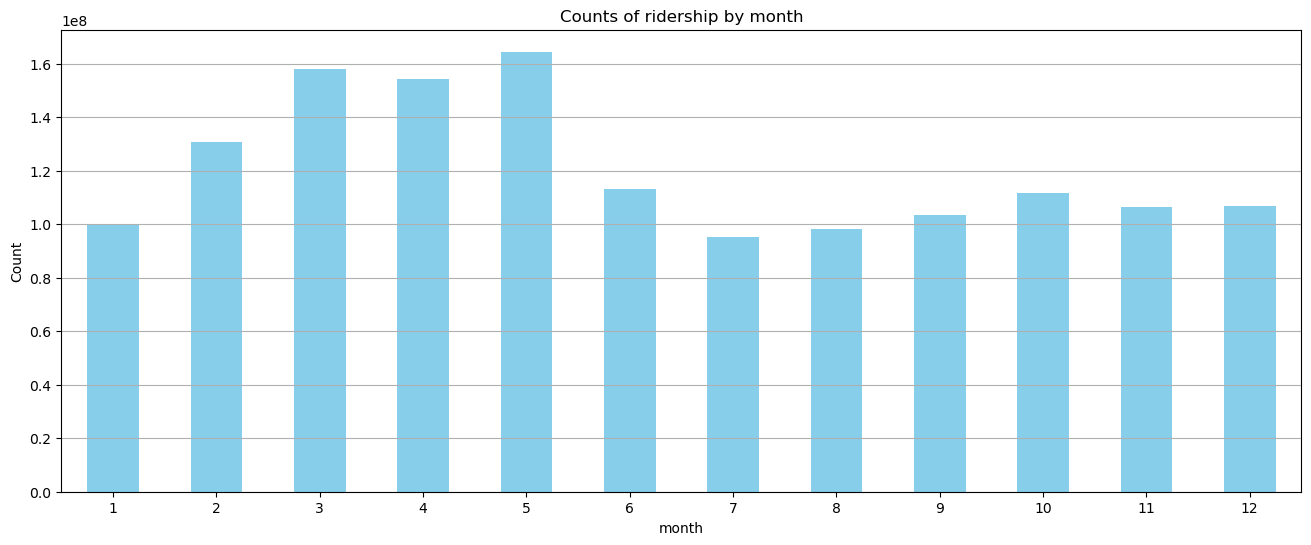

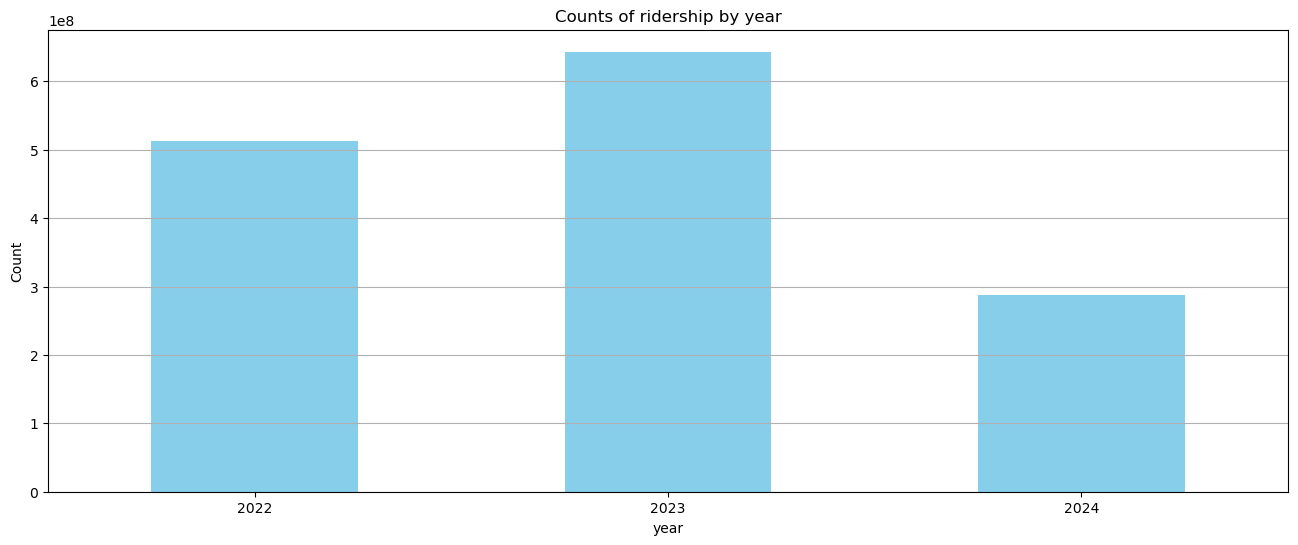

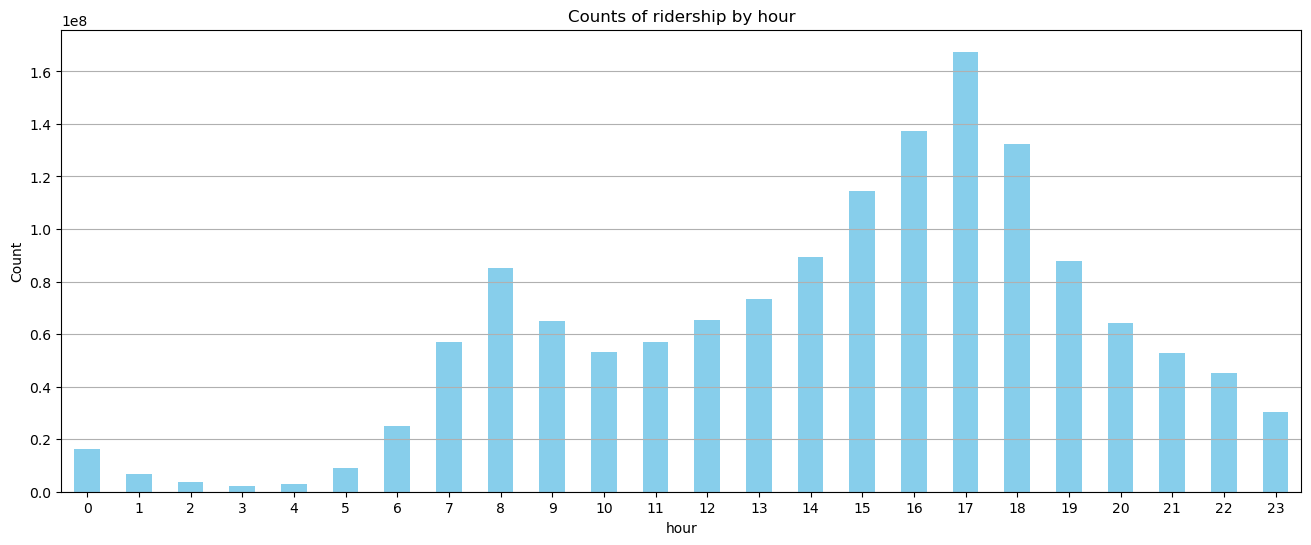

In [32]:
for feature in datetime_features:
    plt.figure(figsize=(16, 6))
    counts = grouped_df.groupby(feature, observed=True)['ridership'].sum()
    counts.plot(kind='bar', color='skyblue')
    plt.title(f'Counts of ridership by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()

In [33]:
grouped_df.to_csv('subway_data_grouped.csv', index=False)

In [4]:
df = pd.read_csv('subway_data_grouped.csv')

/var/folders/8v/myv9ql5d1lg4ct7vbb0zh8000000gn/T/ipykernel_42756/905512086.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('subway_data_grouped.csv')


In [5]:
df['station_complex_id'].unique()

array([8, 9, 10, 13, 14, 16, 17, 20, 22, 103, 107, 118, 119, 143, 144,
       145, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 162, 164, 165, 167, 168, 169, 220, 222, 223, 224, 225,
       228, 231, 232, 234, 276, 277, 296, 297, 298, 299, 300, 301, 303,
       304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 316, 318,
       319, 320, 321, 323, 324, 325, 326, 327, 328, 329, 333, 392, 393,
       394, 395, 396, 397, 398, 399, 403, 404, 405, 407, 409, 413, 414,
       436, 437, 438, 439, 440, 441, 471, 475, 476, 477, 601, 602, 605,
       607, 609, 610, 611, 612, 613, 614, 618, 619, 622, 623, 624, 625,
       628, 635, '618', '619', '622', '623', '624', '625', '628', '635',
       '8', '9', 'TRAM1', 'TRAM2'], dtype=object)

In [6]:
latitude_8 = df[df['station_complex_id'] == '8']['latitude'].iloc[0]
longitude_8 = df[df['station_complex_id'] == '8']['longitude'].iloc[0]
latitude_int_8 = df[df['station_complex_id'] == 8]['latitude'].iloc[0]
longitude_int_8 = df[df['station_complex_id'] == 8]['longitude'].iloc[0]

print(f"Latitude for '8': {latitude_8}")
print(f"Longitude for '8': {longitude_8}")
print(f"Latitude for 8: {latitude_int_8}")
print(f"Longitude for 8: {longitude_int_8}")

Latitude for '8': 40.76481
Longitude for '8': -73.97335
Latitude for 8: 40.76481
Longitude for 8: -73.97335


In [7]:
latitude_9 = df[df['station_complex_id'] == '9']['latitude'].iloc[0]
longitude_9 = df[df['station_complex_id'] == '9']['longitude'].iloc[0]
latitude_int_9 = df[df['station_complex_id'] == 9]['latitude'].iloc[0]
longitude_int_9 = df[df['station_complex_id'] == 9]['longitude'].iloc[0]

print(f"Latitude for '9': {latitude_9}")
print(f"Longitude for '9': {longitude_9}")
print(f"Latitude for 9: {latitude_int_9}")
print(f"Longitude for 9: {longitude_int_9}")

Latitude for '9': 40.76466
Longitude for '9': -73.98066
Latitude for 9: 40.76466
Longitude for 9: -73.98066


In [8]:
df['station_complex_id'] = df['station_complex_id'].astype('category')
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)
df['day'] = df['day'].astype(int)
df['hour'] = df['hour'].astype(int)
df['ridership'] = df['ridership'].astype(float)


In [9]:
df['station_complex_id'] = df['station_complex_id'].astype(str)

In [10]:
average_ridership = df.groupby('station_complex_id')['ridership'].mean().reset_index()
average_ridership['station_complex_id'].unique()

array(['10', '103', '107', '118', '119', '13', '14', '143', '144', '145',
       '146', '147', '149', '150', '151', '152', '153', '154', '155',
       '156', '157', '158', '159', '16', '160', '162', '164', '165',
       '167', '168', '169', '17', '20', '22', '220', '222', '223', '224',
       '225', '228', '231', '232', '234', '276', '277', '296', '297',
       '298', '299', '300', '301', '303', '304', '305', '306', '307',
       '308', '309', '310', '311', '312', '313', '314', '316', '318',
       '319', '320', '321', '323', '324', '325', '326', '327', '328',
       '329', '333', '392', '393', '394', '395', '396', '397', '398',
       '399', '403', '404', '405', '407', '409', '413', '414', '436',
       '437', '438', '439', '440', '441', '471', '475', '476', '477',
       '601', '602', '605', '607', '609', '610', '611', '612', '613',
       '614', '618', '619', '622', '623', '624', '625', '628', '635', '8',
       '9', 'TRAM1', 'TRAM2'], dtype=object)

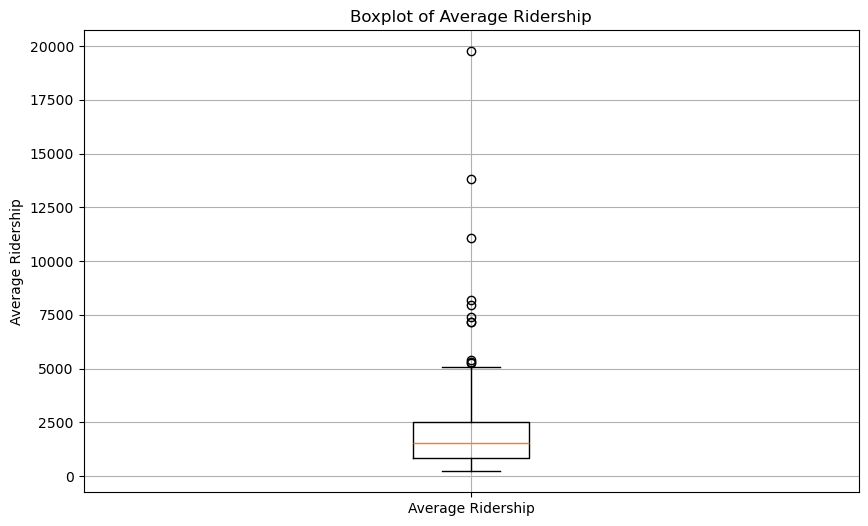

In [11]:
plt.figure(figsize=(10, 6))
plt.boxplot(average_ridership['ridership'], labels=['Average Ridership'])
plt.title('Boxplot of Average Ridership')
plt.ylabel('Average Ridership')
plt.grid(True)
plt.show()

In [13]:
mean = df['ridership'].mean()
std = df['ridership'].std()

print(f'Mean: {mean} \nStandard Deviation: {std}')

Mean: 2276.0379548988867 
Standard Deviation: 4183.4640443182725


In [14]:
print(mean)
print(std)

2276.0379548988867
4183.4640443182725


In [15]:
Q1 = df['ridership'].quantile(0.20)
Q2 = df['ridership'].quantile(0.40)
Q3 = df['ridership'].quantile(0.60)
Q4 = df['ridership'].quantile(0.80)
Q5 = df['ridership'].max()

# Define bins based on percentiles
bins = [-np.inf, Q1, Q2, Q3, Q4, Q5]
labels = [5, 4, 3, 2, 1]

# Ensure all bins have at least one entry
df['busyness_rank'] = pd.cut(df['ridership'], bins=bins, labels=labels)


In [16]:
print(df['busyness_rank'].value_counts())

busyness_rank
5    127218
1    126784
3    126745
2    126714
4    126581
Name: count, dtype: int64


In [17]:
df['busyness_rank'] = df['busyness_rank'].astype(int)

In [18]:
df.head(50)

,station_complex_id,latitude,longitude,year,month,day,hour,ridership,busyness_rank
0,8,40.76481,-73.97335,2022,2,0,0,97.0,5
1,8,40.76481,-73.97335,2022,2,0,1,31.0,5
2,8,40.76481,-73.97335,2022,2,0,2,8.0,5
3,8,40.76481,-73.97335,2022,2,0,3,9.0,5
4,8,40.76481,-73.97335,2022,2,0,4,8.0,5
5,8,40.76481,-73.97335,2022,2,0,5,41.0,5
6,8,40.76481,-73.97335,2022,2,0,6,91.0,5
7,8,40.76481,-73.97335,2022,2,0,7,259.0,4
8,8,40.76481,-73.97335,2022,2,0,8,337.0,4
9,8,40.76481,-73.97335,2022,2,0,9,417.0,4


In [19]:
df.dtypes

station_complex_id     object
latitude              float64
longitude             float64
year                    int64
month                   int64
day                     int64
hour                    int64
ridership             float64
busyness_rank           int64
dtype: object

**Plot average busyness rank per location**

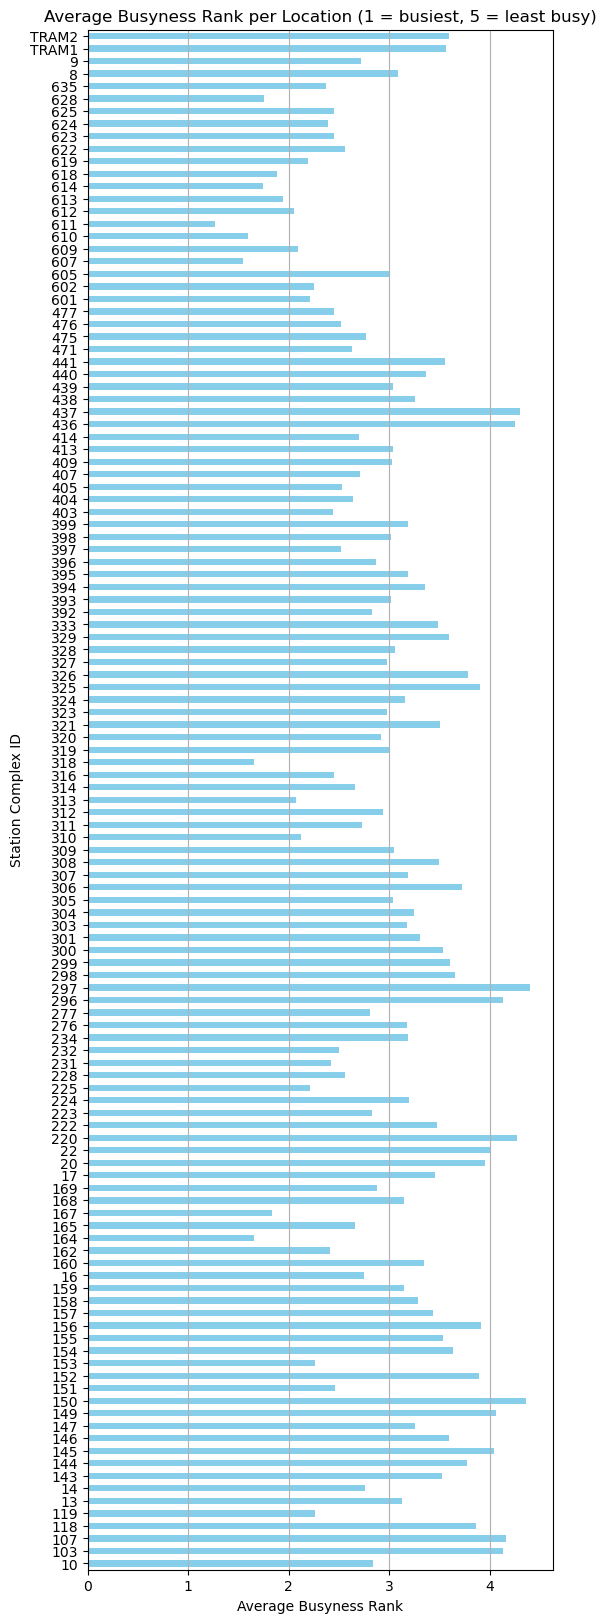

In [20]:
average_busyness_per_location = df.groupby('station_complex_id')['busyness_rank'].mean().reset_index()
plt.figure(figsize=(6, 20))
average = average_busyness_per_location.set_index('station_complex_id')['busyness_rank']
average.plot(kind='barh', color='skyblue')
plt.title('Average Busyness Rank per Location (1 = busiest, 5 = least busy)')
plt.xlabel('Average Busyness Rank')
plt.ylabel('Station Complex ID')
plt.grid(axis='x')
plt.show()

**Split models by mode**

In [21]:
mode_busyness_rank_df = df.groupby('station_complex_id', observed=False)['busyness_rank'].agg(pd.Series.mode).reset_index()

mode_busyness_rank_df.columns = ['station_complex_id', 'mode_busyness_rank']

In [22]:
mode_busyness_rank_df

,station_complex_id,mode_busyness_rank
0,10,2
1,103,4
2,107,5
3,118,4
4,119,1
...,...,...
118,635,1
119,8,5
120,9,1
121,TRAM1,3


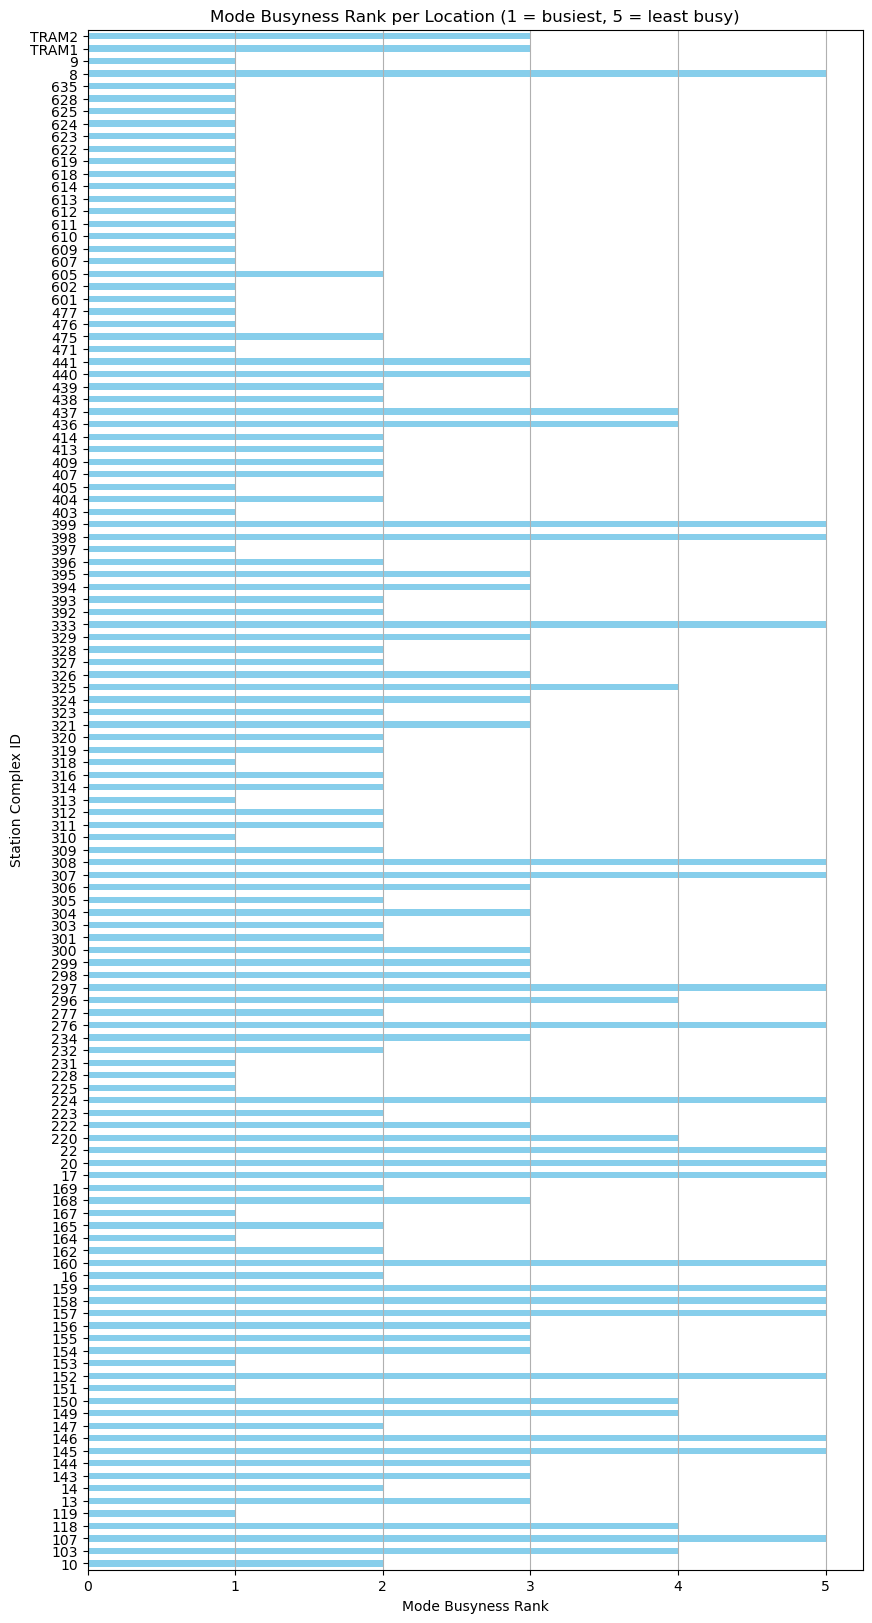

In [23]:
plt.figure(figsize=(10, 20))
mode = mode_busyness_rank_df.set_index('station_complex_id')['mode_busyness_rank']
mode.plot(kind='barh', color='skyblue')
plt.title('Mode Busyness Rank per Location (1 = busiest, 5 = least busy)')
plt.xlabel('Mode Busyness Rank')
plt.ylabel('Station Complex ID')
plt.grid(axis='x')
plt.show()

In [24]:
station_ids_mode_5 = mode_busyness_rank_df[mode_busyness_rank_df['mode_busyness_rank'] == 5]['station_complex_id'].tolist()
station_ids_mode_5

station_ids_mode_others = mode_busyness_rank_df[mode_busyness_rank_df['mode_busyness_rank'] < 5]['station_complex_id'].tolist()

print('Stations with mode busyness rank of 5:', station_ids_mode_5)
print('Stations with mode busyness rank less than 5:', station_ids_mode_others)

Stations with mode busyness rank of 5: ['107', '145', '146', '152', '157', '158', '159', '160', '17', '20', '22', '224', '276', '297', '307', '308', '333', '398', '399', '8']
Stations with mode busyness rank less than 5: ['10', '103', '118', '119', '13', '14', '143', '144', '147', '149', '150', '151', '153', '154', '155', '156', '16', '162', '164', '165', '167', '168', '169', '220', '222', '223', '225', '228', '231', '232', '234', '277', '296', '298', '299', '300', '301', '303', '304', '305', '306', '309', '310', '311', '312', '313', '314', '316', '318', '319', '320', '321', '323', '324', '325', '326', '327', '328', '329', '392', '393', '394', '395', '396', '397', '403', '404', '405', '407', '409', '413', '414', '436', '437', '438', '439', '440', '441', '471', '475', '476', '477', '601', '602', '605', '607', '609', '610', '611', '612', '613', '614', '618', '619', '622', '623', '624', '625', '628', '635', '9', 'TRAM1', 'TRAM2']


In [25]:
df_mode_5 = df[df['station_complex_id'].isin(station_ids_mode_5)]
df_mode_others = df[df['station_complex_id'].isin(station_ids_mode_others)]


In [26]:
df_mode_5

,station_complex_id,latitude,longitude,year,month,day,hour,ridership,busyness_rank
0,8,40.76481,-73.97335,2022,2,0,0,97.0,5
1,8,40.76481,-73.97335,2022,2,0,1,31.0,5
2,8,40.76481,-73.97335,2022,2,0,2,8.0,5
3,8,40.76481,-73.97335,2022,2,0,3,9.0,5
4,8,40.76481,-73.97335,2022,2,0,4,8.0,5
...,...,...,...,...,...,...,...,...,...
620326,8,40.76481,-73.97335,2024,6,6,19,607.0,3
620327,8,40.76481,-73.97335,2024,6,6,20,426.0,4
620328,8,40.76481,-73.97335,2024,6,6,21,200.0,4
620329,8,40.76481,-73.97335,2024,6,6,22,209.0,4


In [27]:
df_mode_others

,station_complex_id,latitude,longitude,year,month,day,hour,ridership,busyness_rank
1855,9,40.76466,-73.98066,2022,2,0,0,7.0,5
1856,9,40.76466,-73.98066,2022,2,0,1,2.0,5
1857,9,40.76466,-73.98066,2022,2,0,2,4.0,5
1858,9,40.76466,-73.98066,2022,2,0,3,1.0,5
1859,9,40.76466,-73.98066,2022,2,0,4,8.0,5
...,...,...,...,...,...,...,...,...,...
634037,TRAM2,40.75734,-73.95411,2024,6,6,19,315.0,4
634038,TRAM2,40.75734,-73.95411,2024,6,6,20,278.0,4
634039,TRAM2,40.75734,-73.95411,2024,6,6,21,223.0,4
634040,TRAM2,40.75734,-73.95411,2024,6,6,22,111.0,5


**Remove outliers**

In [33]:
top_3_stations = average_ridership.sort_values(by='ridership', ascending=False).head(3)

top_3_stations

,station_complex_id,ridership
107,611,19757.245462
106,610,13802.893814
104,607,11059.837252


In [28]:
df_without_outliers = df.query("station_complex_id not in ['611', '610', '607']")

**Different csvs for model testing**

In [29]:
df['busyness_rank'].unique()

array([5, 4, 3, 2, 1])

In [30]:
df.to_csv('subway_data_final.csv', index=False)

In [31]:
df_without_outliers.to_csv('subway_data_final_outliers.csv', index=False)

In [32]:
df_mode_5.to_csv('subway_data_mode5.csv', index=False)
df_mode_others.to_csv('subway_data_mode_others.csv', index=False)